In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import utils
import tensorflow as tf
import numpy as np
import pandas as pd

print(tf.__version__)

2.3.1


In [6]:
FEED_INFO_PATH = "my_data/train_14/my_info_gene.csv"

my_feed_info = pd.read_csv(FEED_INFO_PATH, header=0, index_col=None)
feed_feature = my_feed_info.columns

In [7]:
author_data = my_feed_info['authorid'].values
videoplaysec_data = my_feed_info['videoplayseconds'].values
song_data = my_feed_info['bgm_song_id'].values
singer_data = my_feed_info['bgm_singer_id'].values

In [8]:
i_author_input = layers.Input(shape=(None, ), dtype='int32', name='i_author_input')
dis_author_input = layers.Input(shape=(None, ), dtype='int32', name='dis_author_input')
recom_author_input = layers.Input(shape=(1, ), dtype='int32', name='recom_author_input')

author_encoder = preprocessing.IntegerLookup(oov_value=-2, mask_value=-1, name='author_lookup')
author_encoder.adapt(author_data.astype(np.int32))

i_author_enco = author_encoder(i_author_input)
dis_author_enco = author_encoder(dis_author_input)
recom_author_enco = author_encoder(recom_author_input)

author_emb_layer = layers.Embedding(input_dim=len(author_encoder.get_vocabulary()), output_dim=32,
                                    mask_zero=True, name='author_embedding_layer')

i_author_emb = author_emb_layer(i_author_enco)
dis_author_emb = author_emb_layer(dis_author_enco)
recom_authot_emb = author_emb_layer(recom_author_enco)

Author_Embedding = models.Model(inputs=[i_author_input, dis_author_input, recom_author_input],
                                outputs=[i_author_emb, dis_author_emb, recom_authot_emb],
                                name='Author_Embedding')

In [9]:

i_song_input = layers.Input(shape=(None, ), dtype='int32', name='i_song_input')
dis_song_input = layers.Input(shape=(None, ), dtype='int32', name='dis_song_input')
recom_song_input = layers.Input(shape=(1, ), dtype='int32', name='recom_song_input')

song_encoder = preprocessing.IntegerLookup(oov_value=-2, mask_value=-1, name='song_lookup')
song_encoder.adapt(song_data.astype(np.int32))

i_song_enco = song_encoder(i_song_input)
dis_song_enco = song_encoder(dis_song_input)
recom_song_enco = song_encoder(recom_song_input)

song_emb_layer = layers.Embedding(input_dim=len(song_encoder.get_vocabulary()), output_dim=32,
                                  mask_zero=True, name='song_embedding_layer')

i_song_emb = song_emb_layer(i_song_enco)
dis_song_emb = song_emb_layer(dis_song_enco)
recom_song_emb = song_emb_layer(recom_song_enco)

Song_Embedding = models.Model(inputs=[i_song_input, dis_song_input, recom_song_input],
                              outputs=[i_song_emb, dis_song_emb, recom_song_emb],
                              name='Song_Embedding')

In [10]:
i_singer_input = layers.Input(shape=(None, ), dtype='int32', name='i_singer')
dis_singer_input = layers.Input(shape=(None, ), dtype='int32', name='dis_singer')
recom_singer_input = layers.Input(shape=(1, ), dtype='int32', name='recom_singer')

singer_encoder = preprocessing.IntegerLookup(oov_value=-2, mask_value=-1, name='singer_encoder')
singer_encoder.adapt(singer_data.astype(np.int32))

i_singer_enco = singer_encoder(i_singer_input)
dis_singer_enco = singer_encoder(dis_singer_input)
recom_singer_enco = singer_encoder(recom_singer_input)

singer_emb_layer = layers.Embedding(input_dim=len(singer_encoder.get_vocabulary()), output_dim=32,
                                    mask_zero=True, name='singer_embedding_layer')

i_singer_emb = singer_emb_layer(i_singer_enco)
dis_singer_emb = singer_emb_layer(dis_singer_enco)
recom_singer_emb = singer_emb_layer(recom_singer_enco)

Singer_Embedding = models.Model(inputs=[i_singer_input, dis_singer_input, recom_singer_input],
                                outputs=[i_singer_emb, dis_singer_emb, recom_singer_emb],
                                name='Singer_Embedding')

In [11]:
i_psec_input = layers.Input(shape=(None, ), dtype='int32', name='i_psec_input')
dis_psec_input = layers.Input(shape=(None, ), dtype='int32', name='dis_psec_input')
recom_psec_input = layers.Input(shape=(1, ), dtype='int32', name='recom_psec_input')

psec_encoder = preprocessing.IntegerLookup(oov_value=-2, mask_value=-1, name='psec_encoder')
psec_encoder.adapt(videoplaysec_data.astype(np.int32))

i_psec_enco = psec_encoder(i_psec_input)
dis_psec_enco = psec_encoder(dis_psec_input)
recom_psec_enco = psec_encoder(recom_psec_input)

psec_emb_layer =layers.Embedding(input_dim=len(psec_encoder.get_vocabulary()), output_dim=4,
                                 mask_zero=True, name='psec_embedding_layer')

i_psec_emb = psec_emb_layer(i_psec_enco)
dis_psec_emb = psec_emb_layer(dis_psec_enco)
recom_psec_emb = psec_emb_layer(recom_psec_enco)

Psec_Embedding = models.Model(inputs=[i_psec_input, dis_psec_input, recom_psec_input],
                              outputs=[i_psec_emb, dis_psec_emb, recom_psec_emb],
                              name='Psec_Embedding')

In [13]:
TAG_NUMBER = 351
i_tag_input = layers.Input(shape=(None, TAG_NUMBER), dtype='int16', name='i_tag_input')
dis_tag_input = layers.Input(shape=(None, TAG_NUMBER), dtype='int16', name='dis_tag_input')
recom_tag_input = layers.Input(shape=(1, TAG_NUMBER), dtype='int16', name='recom_tag_input')

tag_mask = layers.Masking(mask_value=0, name='tag_mask')

i_tag_mask = tag_mask(i_tag_input)
dis_tag_mask = tag_mask(dis_tag_input)

tag_encoder = layers.TimeDistributed(layers.Dense(units=8, use_bias=False, name='tag_dense'), name='tag_encoder_layer')

i_tag_enco = tag_encoder(i_tag_mask)
dis_tag_enco = tag_encoder(dis_tag_mask)
recom_tag_enco = tag_encoder(recom_tag_input)

Tag_Encoder = models.Model(inputs=[i_tag_input, dis_tag_input, recom_tag_input],
                           outputs=[i_tag_enco, dis_tag_enco, recom_tag_enco],
                           name='Tag_Encoder')

In [14]:
FEED_EMBEDDING_LEN = 512
ifeed_emb_input = layers.Input(shape=(None, FEED_EMBEDDING_LEN), dtype='float32', name='ifeed_emb_input')
disfeed_emb_input = layers.Input(shape=(None, FEED_EMBEDDING_LEN), dtype='float32', name='disfeed_emb_input')
recomfeed_emb_input = layers.Input(shape=(1, FEED_EMBEDDING_LEN), dtype='float32', name='recomfeed_emb_input')

feed_emb_mask = layers.Masking(mask_value=0, name='feed_emb_mask')

ifeed_emb_mask = feed_emb_mask(ifeed_emb_input)
disfeed_emb_mask = feed_emb_mask(disfeed_emb_input)

Feed_Embedding = models.Model(inputs=[ifeed_emb_input, disfeed_emb_input, recomfeed_emb_input],
                              outputs=[ifeed_emb_mask, disfeed_emb_mask, recomfeed_emb_input],
                              name='Feed_Embedding')

In [15]:
feature_concat_layer = layers.Concatenate(name='feature_concat_layer')

i_feed_vec = feature_concat_layer([Author_Embedding.outputs[0],
                                   Song_Embedding.outputs[0],
                                   Singer_Embedding.outputs[0],
                                   Psec_Embedding.outputs[0],
                                   Tag_Encoder.outputs[0],
                                   Feed_Embedding.outputs[0]])
dis_feed_vec = feature_concat_layer([Author_Embedding.outputs[1],
                                     Song_Embedding.outputs[1],
                                     Singer_Embedding.outputs[1],
                                     Psec_Embedding.outputs[1],
                                     Tag_Encoder.outputs[1],
                                     Feed_Embedding.outputs[1]])
recom_feed_vec = feature_concat_layer([Author_Embedding.outputs[2],
                                       Song_Embedding.outputs[2],
                                       Singer_Embedding.outputs[2],
                                       Psec_Embedding.outputs[2],
                                       Tag_Encoder.outputs[2],
                                       Feed_Embedding.outputs[2]])

In [16]:
class TileVecLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(TileVecLayer, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        return tf.tile(inputs[0], (1, tf.shape(inputs[1])[1], 1))


class GetAttentionVec(layers.Layer):
    def __init__(self, **kwargs):
        super(GetAttentionVec, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        score_mask = inputs[0]._keras_mask
        the_output = tf.squeeze(inputs[0], axis=2)
        the_output = tf.where(score_mask, the_output, K.ones_like(the_output) * (-2e30))
        the_output = tf.expand_dims(tf.nn.softmax(the_output), axis=1)
        the_output = tf.squeeze(tf.matmul(the_output, inputs[1]), axis=1)
        return the_output


class SubsVecLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(SubsVecLayer, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        return tf.subtract(inputs[0], inputs[1])

    def compute_output_shape(self, input_shape):
        return tuple(input_shape[0])


class SqueezeLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(SqueezeLayer, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        return tf.squeeze(inputs, axis=1)


tile_vec_layer = TileVecLayer(name='tile_vec_layer')
attention_vec_layer = GetAttentionVec(name='attention_vec_layer')
subs_vec_layer = SubsVecLayer(name='subs_vec_layer')
squeeze_vec_layer = SqueezeLayer(name='squeeze_vec_layer')

In [17]:
i_action_input = layers.Input(shape=(None, 4), dtype='float32', name='i_action_input')
i_tile_recom_vec = tile_vec_layer([recom_feed_vec, i_feed_vec])
i_subs_vec = subs_vec_layer([i_feed_vec, i_feed_vec])
i_concat_vec = layers.Concatenate(name='i_concat_layer')([i_action_input,
                                                          i_feed_vec,
                                                          i_subs_vec,
                                                          i_tile_recom_vec])
i_attention_score = layers.TimeDistributed(layers.Dense(units=256, name='i_attention_dense_1'), name='i_attention_1')(i_concat_vec)
i_attention_score = layers.TimeDistributed(layers.PReLU(name='i_prelu'), name='i_attention_2')(i_attention_score)
i_attention_score = layers.TimeDistributed(layers.Dense(units=1, name='i_attention_dense_2'), name='i_attention_3')(i_attention_score)
i_attention_vec = attention_vec_layer([i_attention_score, i_feed_vec])

In [18]:
dis_tile_recom_vec = tile_vec_layer([recom_feed_vec, dis_feed_vec])
dis_subs_vec = subs_vec_layer([dis_feed_vec, dis_feed_vec])
dis_concat_vec = layers.Concatenate(name='dis_concat_layer')([dis_feed_vec,
                                                              dis_subs_vec,
                                                              dis_tile_recom_vec])
dis_attention_score = layers.TimeDistributed(layers.Dense(units=256, name='dis_attention_dense_1'), name='dis_attention_1')(dis_concat_vec)
dis_attention_score = layers.TimeDistributed(layers.PReLU(name='dis_prelu'), name='dis_attention_2')(dis_attention_score)
dis_attention_score = layers.TimeDistributed(layers.Dense(units=1, name='dis_attention_dense_2'), name='dis_attention_3')(dis_attention_score)
dis_attention_vec = attention_vec_layer([dis_attention_score, dis_feed_vec])

In [19]:
device_input = layers.Input(shape=(2, ), dtype='float32', name='user_device_input')
recom_squeeze_vec = squeeze_vec_layer(recom_feed_vec)
final_concat_layer = layers.Concatenate(name='final_concat_layer')
final_vec = final_concat_layer([i_attention_vec, dis_attention_vec, recom_squeeze_vec, device_input])
action_inference = layers.Dense(units=512, name='final_dense_1')(final_vec)
action_inference = layers.PReLU(name='final_prelu_1')(action_inference)
action_inference = layers.Dense(units=256, name='final_dense_2')(action_inference)
action_inference = layers.PReLU(name='final_prelu_2')(action_inference)
action_inference = layers.Dense(units=4, activation=activations.sigmoid, name='output_layer')(action_inference)

Model: "My_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i_author_input (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
i_song_input (InputLayer)       [(None, None)]       0                                            
__________________________________________________________________________________________________
i_singer (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
i_psec_input (InputLayer)       [(None, None)]       0                                            
___________________________________________________________________________________________

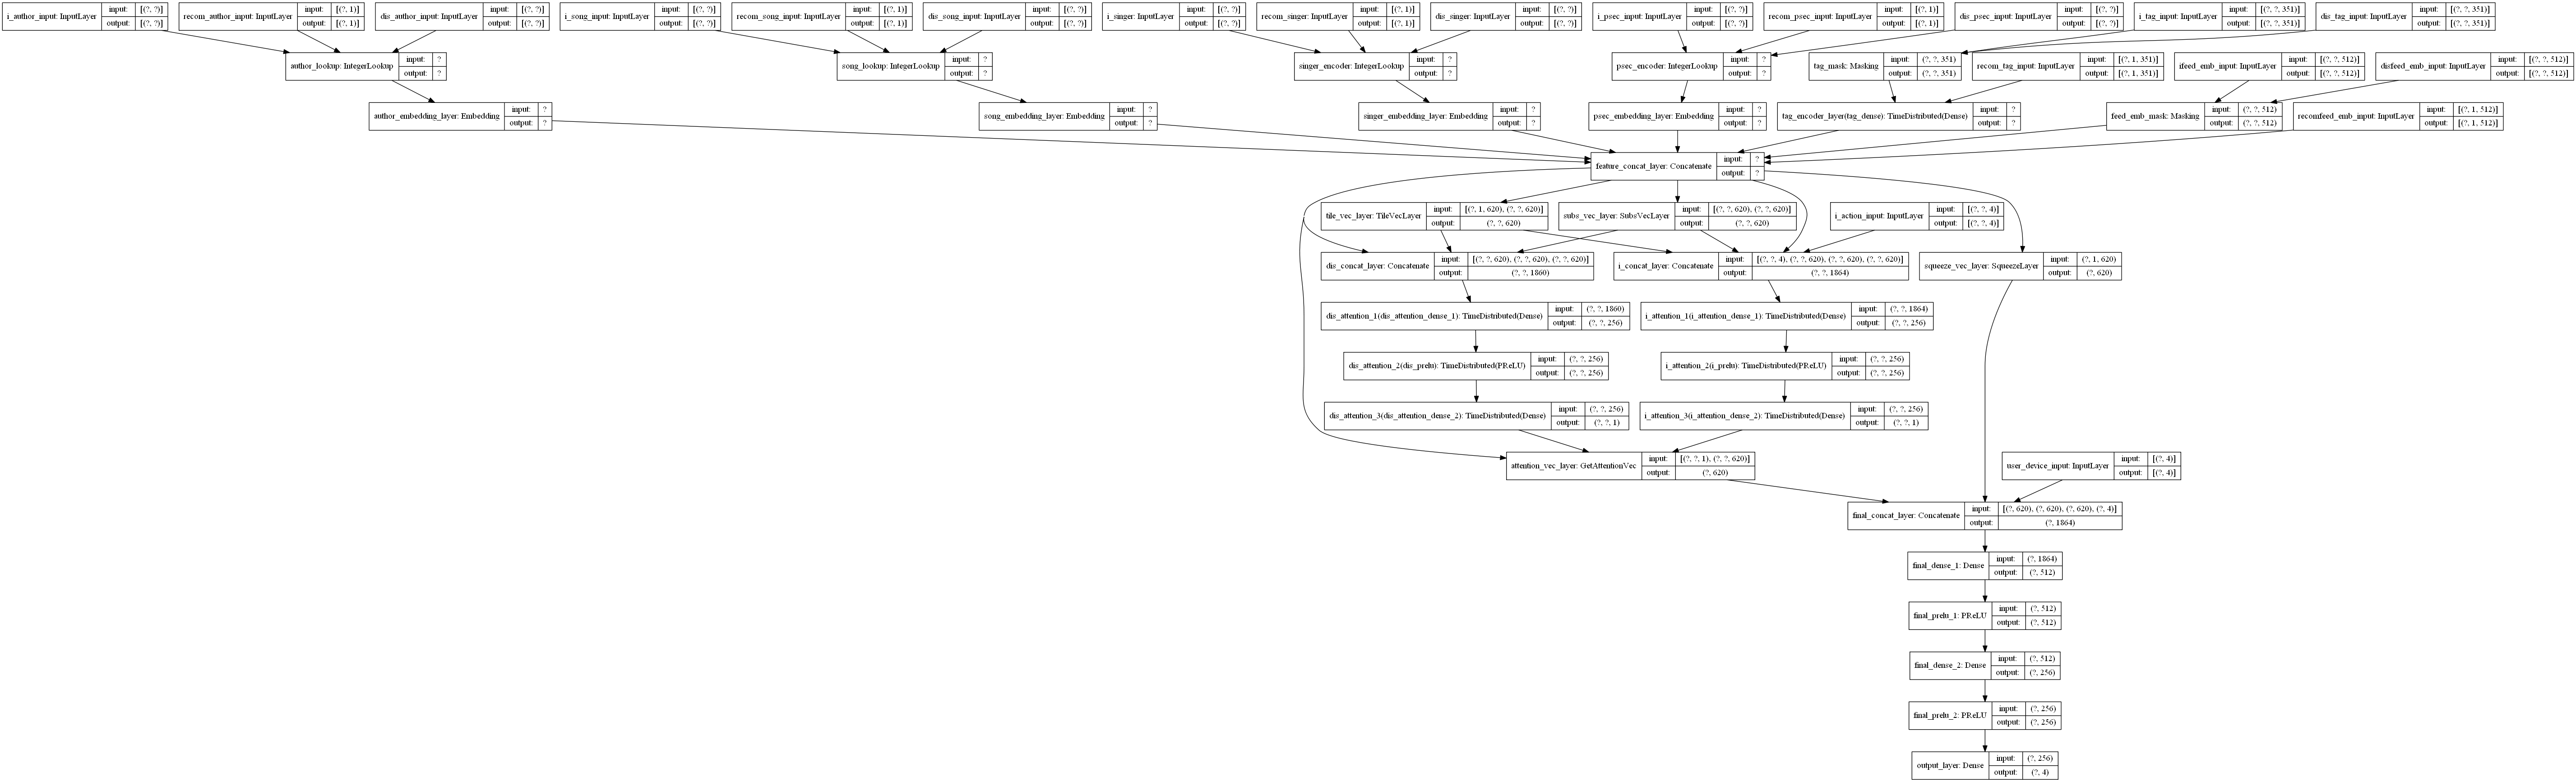

In [20]:
My_Model = models.Model(inputs=[i_author_input, dis_author_input, recom_author_input,
                                i_song_input, dis_song_input, recom_song_input,
                                i_singer_input, dis_singer_input, recom_singer_input,
                                i_psec_input, dis_psec_input, recom_psec_input,
                                i_tag_input, dis_tag_input, recom_tag_input,
                                ifeed_emb_input, disfeed_emb_input, recomfeed_emb_input,
                                i_action_input, device_input],
                        outputs=[action_inference],
                        name='My_Model')
print(My_Model.summary())
utils.plot_model(My_Model, show_shapes=True)

In [23]:
My_Model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                 loss=losses.BinaryCrossentropy(),
                 metrics=[metrics.BinaryAccuracy()])

['BinaryCrossentropy', 'CategoricalCrossentropy', 'CategoricalHinge', 'CosineSimilarity', 'Hinge', 'Huber', 'KLD', 'KLDivergence', 'LogCosh', 'Loss', 'MAE', 'MAPE', 'MSE', 'MSLE', 'MeanAbsoluteError', 'MeanAbsolutePercentageError', 'MeanSquaredError', 'MeanSquaredLogarithmicError', 'Poisson', 'Reduction', 'SparseCategoricalCrossentropy', 'SquaredHinge', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'binary_crossentropy', 'categorical_crossentropy', 'categorical_hinge', 'cosine_similarity', 'deserialize', 'get', 'hinge', 'huber', 'kl_divergence', 'kld', 'kullback_leibler_divergence', 'log_cosh', 'logcosh', 'mae', 'mape', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_error', 'mean_squared_logarithmic_error', 'mse', 'msle', 'poisson', 'serialize', 'sparse_categorical_crossentropy', 'squared_hinge']
